In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/Users/project/aiffel/apartment/apartment/train.csv')
test = pd.read_csv('/Users/project/aiffel/apartment/apartment/test.csv')

## 데이터 전처리

### 결측치 처리

#### train / test

In [3]:
train.isna().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

In [4]:
test.isna().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
dtype: int64

### 이상치 처리

- train

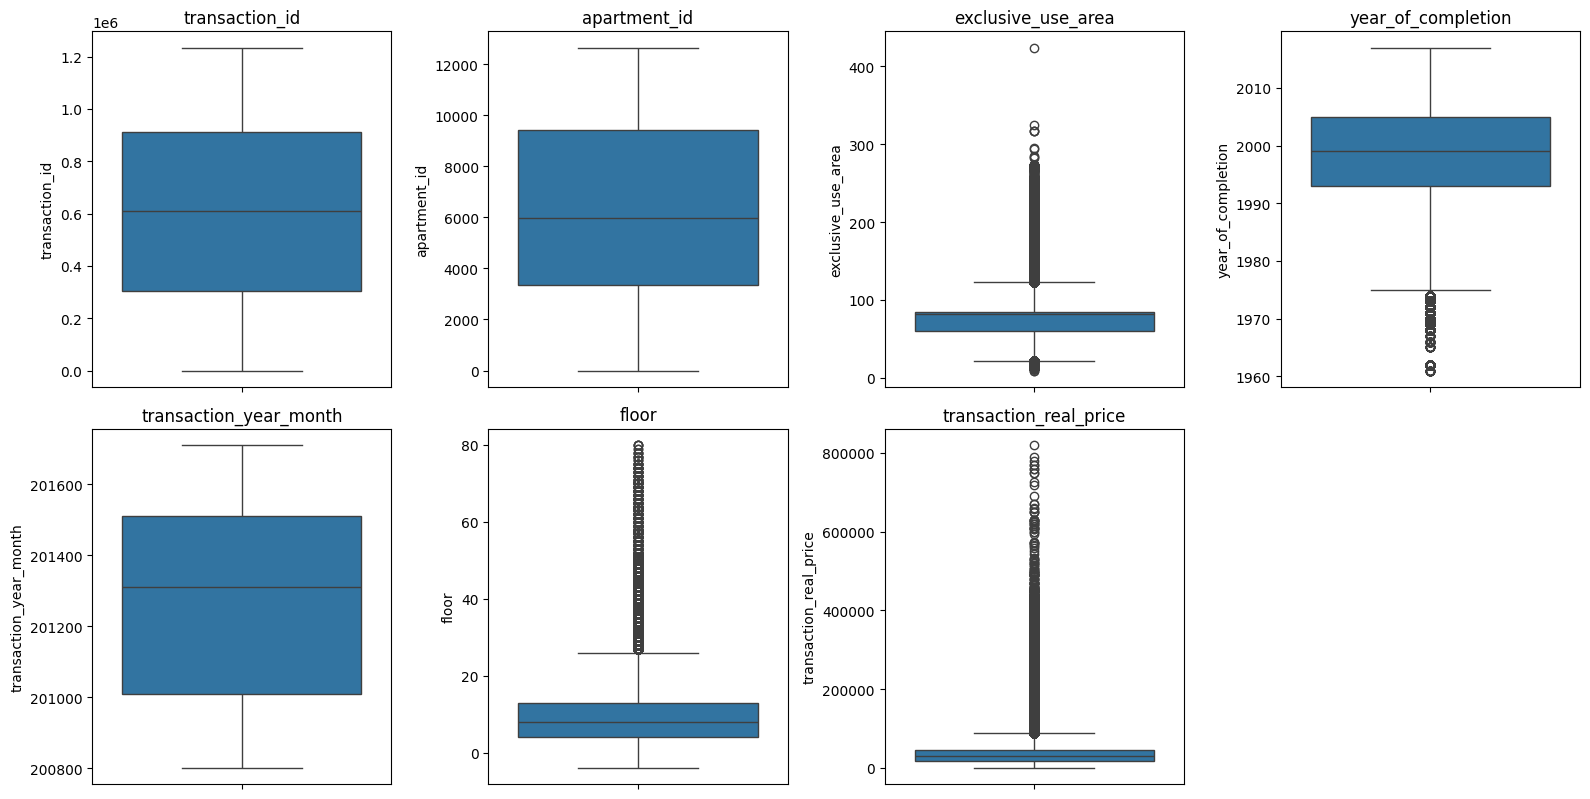

In [5]:
# 숫자 컬럼만 선택
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

# 서브블롯의 행을 계산
num_cols = len(numerical_cols)
num_rows = num_cols // 4
num_rows += num_cols % 4

position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
for k, col in zip(position, numerical_cols):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.boxplot(train[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

- test

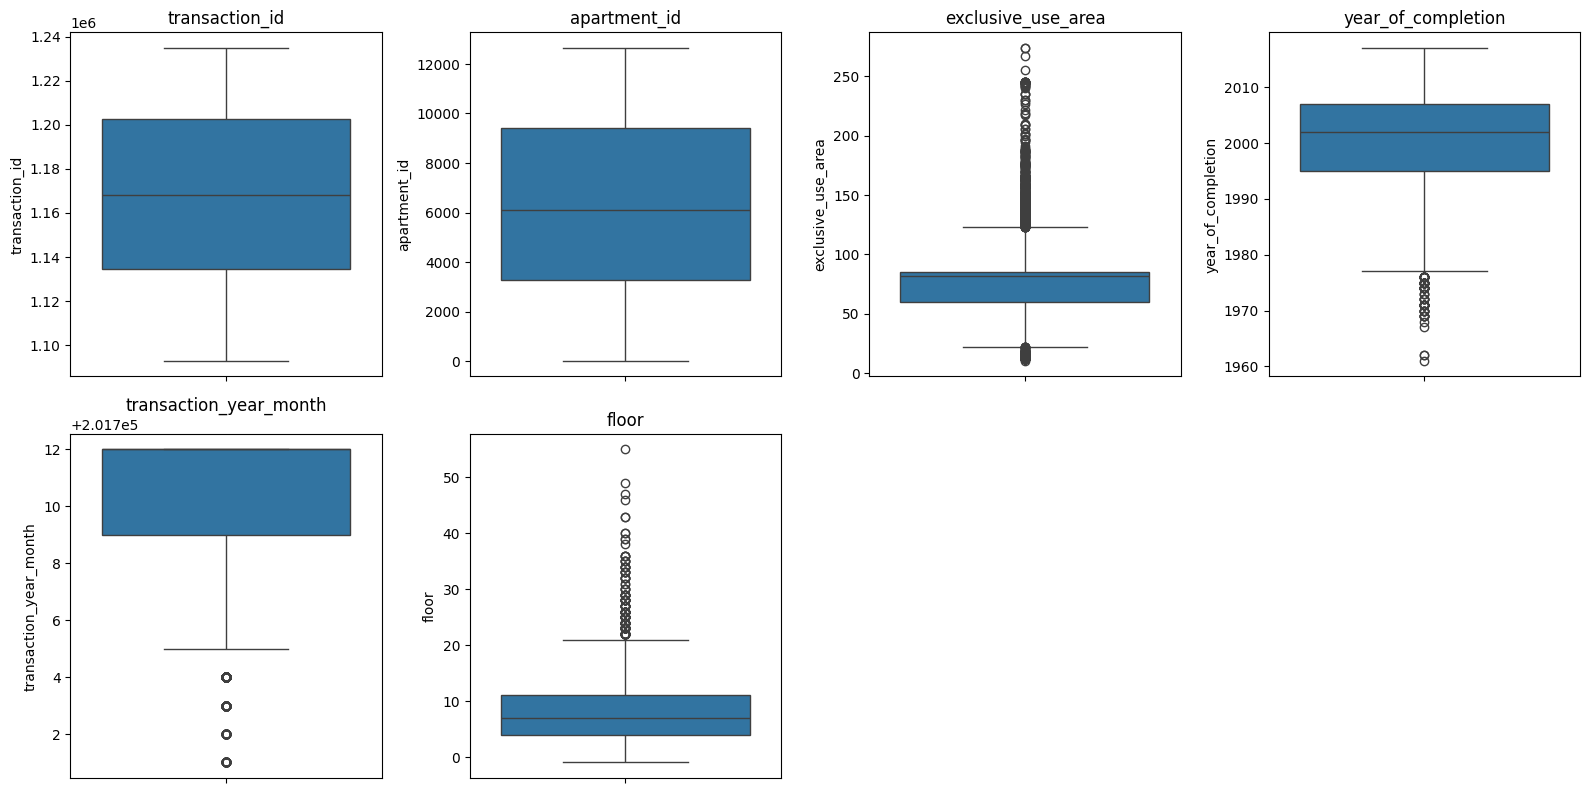

In [6]:
# 숫자 컬럼만 선택
numerical_cols = test.select_dtypes(include=[np.number]).columns.tolist()

# 서브블롯의 행을 계산
num_cols = len(numerical_cols)
num_rows = num_cols // 4
num_rows += num_cols % 4

position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
for k, col in zip(position, numerical_cols):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.boxplot(test[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

### 특성 공학

#### 새로운 특성 생성

##### 서울/부산 데이터 나누기
서울특별시 데이터가 약 80% 이상이기 때문에 서울특별시에 대한 데이터만 쓸 예정

In [7]:
seoul_train = train[train['city'] == '서울특별시']
busan_train = train[train['city'] == '부산광역시']

In [8]:
seoul_test = test[test['city'] == '서울특별시']
busan_test = test[test['city'] == '부산광역시']

##### 지오코딩

지오코딩된 위도, 경도 데이터 합치기

```python
# 라이브러리 호출
from geopy.geocoders import Nominatim
from tqdm import tqdm

# 데이터 불러오기
import os
import pandas as pd
csv_path = os.getenv("HOME") +"/aiffel/Datathon/data/"
apt_loc_df = pd.read_csv(csv_path + "apt_location.csv")           # 파일 위치 변경해주시면 됩니다.

# geopy의 Nominatim을 사용하여 주소를 위도, 경도로 변환
geolocator = Nominatim(user_agent="my_geocoder", timeout=10)           
                         
# tqdm을 사용하여 반복 진행 상태 확인
tqdm.pandas()
address_changed= apt_loc_df['주소'].iloc["본인이 맡은 행 범위"]    # 여기에 본인이 맡은 행 범위 입력하면 됩니다.                     
apt_loc_df[['위도', '경도']] = address_changed.progress_apply(lambda x: pd.Series(geolocator.geocode(x)[1] if geolocator.geocode(x) else [None, None]))

# 지오코딩된 데이터프레임을 csv 파일로 저장
apt_loc_df.to_csv('apt_loc_df.csv', index=False)
```

- apartment

In [9]:
apt_loc = pd.read_csv('/Users/project/aiffel/apartment/apartment/apt_location.csv')
apt_loc

,apartment_id,address,lat,long
0,7622,서울특별시 신교동 6-13,37.584160,126.967230
1,5399,서울특별시 필운동 142,37.577363,126.969097
2,3578,서울특별시 필운동 174-1,37.577363,126.969097
3,10957,서울특별시 내수동 95,37.572940,126.971800
4,10639,서울특별시 내수동 110-15,37.572940,126.971800
...,...,...,...,...
8169,1878,서울특별시 마천동 50,37.498030,127.151670
8170,1876,서울특별시 둔촌동 64,37.528958,127.144766
8171,5606,서울특별시 천호동 121-32,37.542940,127.127330
8172,1878,서울특별시 천호동 571,37.542940,127.127330


In [10]:
apt_loc.columns

Index(['apartment_id', 'address', 'lat', 'long'], dtype='object')

In [11]:
seoul_train.columns

Index(['transaction_id', 'apartment_id', 'city', 'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor',
       'transaction_real_price'],
      dtype='object')

##### 공공데이터

- park  
https://data.seoul.go.kr/dataList/OA-394/S/1/datasetView.do

In [58]:
seoul_park = pd.read_csv('/Users/project/aiffel/apartment/apartment/seoul_park.csv', encoding='cp949')
seoul_park.head()

,연번,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,2,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120,448852.675,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do
2,3,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690m²,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,NaN,지하철 4호선 대공원역 하차(2번 출구) 도보 15분 정도 문의처 02)500-73...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,과천시,경기도 과천시 대공원광장로 102,전략기획실,02-500-7032,200994.267,437163.981,127.019846,37.426449,http://grandpark.seoul.go.kr/
3,4,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,http://parks.seoul.go.kr/template/common/img/p...,NaN,지하철 분당선 서울숲역 3번출구 도보로 약5분 2호선 뚝섬역 8번출구 도보로 약 1...,http://parks.seoul.go.kr/file/info/view.do?fId...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,02-460-2905,203695.432,449290.726,127.041798,37.543072,http://parks.seoul.go.kr/template/sub/seoulfor...
4,5,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,http://parks.seoul.go.kr/template/common/img/p...,지하철 6호선 월드컵경기장역 하차 → 1번 출구로 나온 후 직진 → 큰길(도로)이 ...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,02-300-5500,190658.070,451598.831,126.878907,37.571805,http://parks.seoul.go.kr/template/sub/worldcup...


In [59]:
# 위도, 경도 데이터가 null 값은 '서울로7017' 위치 데이터 채우기
seoul_park.loc[seoul_park['공원명'] == '서울로7017', '공원주소'] = '서울시 중구 봉래동2가 122-14'
seoul_park.loc[seoul_park['공원명'] == '서울로7017', '공원주소']

131    서울시 중구 봉래동2가 122-14
Name: 공원주소, dtype: object

In [60]:
# tqdm을 사용하여 반복 진행 상태 확인
tqdm.pandas()
address_changed= seoul_park.loc[seoul_park['공원명'] == '서울로7017', '공원주소']             
result = address_changed.progress_apply(lambda x: pd.Series(geolocator.geocode(x)[1] 
                                                                              if geolocator.geocode(x) else [None, None]))
result

100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%EC%84%9C%EC%9A%B8%EC%8B%9C+%EC%A4%91%EA%B5%AC+%EB%B4%89%EB%9E%98%EB%8F%992%EA%B0%80+122-14&format=json&limit=1 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)')))

In [61]:
seoul_park.loc[seoul_park['공원명'] == '서울로7017','Y좌표(WGS84)'] = 37.55661
seoul_park.loc[seoul_park['공원명'] == '서울로7017','X좌표(WGS84)'] = 126.97177
seoul_park.loc[seoul_park['공원명'] == '서울로7017']

,연번,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
131,132,서울로7017,서울로7017은 70년대 준공된 서울역 고가가 안전에 문제점이 도출되면서 철거가 될...,NaN,NaN,NaN,NaN,NaN,중림 만리동(서울로 종점부에서 진입) 지하철- 충정로(경기대입구) - 2 5호선 :...,NaN,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울시 중구 봉래동2가 122-14,서울로운영단,02-313-7017,NaN,NaN,126.97177,37.55661,NaN


In [62]:
# csv 파일 저장
seoul_park.to_csv('seoul_park_modified.csv', index=False)

- hospital  
https://data.seoul.go.kr/dataList/OA-16479/S/1/datasetView.do

In [80]:
hospital_df = pd.read_csv('/Users/project/aiffel/apartment/apartment/hospital.csv')
hospital_df.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,진료과목내용명,지정취소일자,완화의료지정형태,완화의료담당부서명,구급차특수,구급차일반,총인원,구조사수,허가병상수,최초지정일자
0,3090000,PHMA220073090033021200001,2007-05-22,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3060000,PHMA220203060034021200001,2020-05-29,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3220000,PHMA219833220033021200002,1983-04-04,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3180000,PHMA220053180034021200007,2006-12-01,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3220000,PHMA220223220033021200001,2022-02-04,NaN,3,폐업,3,폐업,2023-02-15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# 정상 영업 중인 종합병원 데이터만 남기기
hospital_df['영업상태명'].unique()

array(['영업/정상', '폐업', '제외/삭제/전출', '휴업', '취소/말소/만료/정지/중지'], dtype=object)

In [82]:
hospital_df['영업상태코드'].unique()

array([1, 3, 5, 2, 4])

In [83]:
hospital_df = hospital_df[(hospital_df['영업상태코드']==1 ) & (hospital_df['업태구분명']=='종합병원')].reset_index(drop=True)
hospital_df.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,진료과목내용명,지정취소일자,완화의료지정형태,완화의료담당부서명,구급차특수,구급차일반,총인원,구조사수,허가병상수,최초지정일자
0,3220000,PHMA219833220033021200002,1983-04-04,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3100000,PHMA219953100034021200001,1995-01-14,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3100000,PHMA219893100034021200001,1989-08-14,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3120000,PHMA218853120033021200001,1974-03-25,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3230000,PHMA219893230034021201574,1989-05-20,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   개방자치단체코드   58 non-null     int64  
 1   관리번호       58 non-null     object 
 2   인허가일자      58 non-null     object 
 3   인허가취소일자    0 non-null      float64
 4   영업상태코드     58 non-null     int64  
 5   영업상태명      58 non-null     object 
 6   상세영업상태코드   58 non-null     int64  
 7   상세영업상태명    58 non-null     object 
 8   폐업일자       0 non-null      object 
 9   휴업시작일자     0 non-null      object 
 10  휴업종료일자     0 non-null      object 
 11  재개업일자      0 non-null      float64
 12  전화번호       58 non-null     object 
 13  소재지면적      46 non-null     float64
 14  소재지우편번호    13 non-null     object 
 15  지번주소       33 non-null     object 
 16  도로명주소      58 non-null     object 
 17  도로명우편번호    58 non-null     object 
 18  사업장명       58 non-null     object 
 19  최종수정일자     58 non-null     object 
 20  데이터갱신구분    5

In [85]:
# 위치를 나타낼 때 필요한 칼럼만 복사
hospital_df.columns

Index(['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적',
       '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분',
       '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '의료기관종별명', '의료인수', '입원실수',
       '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자', '완화의료지정형태', '완화의료담당부서명',
       '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수', '최초지정일자'],
      dtype='object')

In [86]:
hospital_loc_df = hospital_df[['사업장명', '도로명주소', '좌표정보(X)', '좌표정보(Y)']].copy()
hospital_loc_df.head()

,사업장명,도로명주소,좌표정보(X),좌표정보(Y)
0,연세대학교의과대학 강남세브란스병원,"서울특별시 강남구 언주로 211, 강남세브란스병원 (도곡동)",204044.915103,443372.921667
1,노원을지대학교병원,"서울특별시 노원구 한글비석로 68, 을지병원 (하계동)",206102.455978,459346.769704
2,인제대학교 상계백병원,"서울특별시 노원구 동일로 1342, 상계백병원 (상계동)",205488.916466,460701.027581
3,연세대학교의과대학세브란스병원,서울특별시 서대문구 연세로 50-1 (신촌동),194584.959249,451381.585492
4,재단법인아산사회복지재단 서울아산병원,"서울특별시 송파구 올림픽로43길 88, 서울아산병원 (풍납동)",209607.590372,447120.577229


In [91]:
# 좌표 정보로 위도, 경도 칼럼 생성 
from pyproj import Proj, transform

def convert_to_lat_lon(x, y):
    # 원래 좌표체계 (UTM-K, UTM-K(Bessel))
    original_proj = Proj(init='epsg:5181')

    # 변환할 좌표체계 (WGS84)
    wgs84_proj = Proj(init='epsg:4326')

    # 좌표 변환
    lon, lat = transform(original_proj, wgs84_proj, x, y)

    return lat, lon

# 테스트 좌표
x_coordinate = hospital_loc_df['좌표정보(X)']
y_coordinate = hospital_loc_df['좌표정보(Y)']

hospital_loc_df['lat'], hospital_loc_df['long'] = convert_to_lat_lon(x_coordinate, y_coordinate)

hospital_loc_df[['lat', 'long']].head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_24418/1492367696.py:12: FutureWarning: This function is deprecated. See: https://pyproj

,lat,long
0,37.489799,127.045738
1,37.633711,127.069136
2,37.645917,127.062195
3,37.561950,126.938711
4,37.523524,127.108686


In [92]:
# 결측치 처리
hospital_loc_df[hospital_loc_df.isna().any(axis=1)]

,사업장명,도로명주소,좌표정보(X),좌표정보(Y),lat,long
27,순천향대학교 부속 서울병원,서울특별시 용산구 대사관로 59 (한남동),NaN,NaN,NaN,NaN
28,한양대학교병원,서울특별시 성동구 왕십리로 222-1 (사근동),NaN,NaN,NaN,NaN


In [ ]:
from geopy.geocoders import Nominatim

def get_latitude_longitude(address):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(address)
    
    if location:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None

# 주소 입력
address = "서울특별시 용산구 대사관로 59"
latitude, longitude = get_latitude_longitude(address)

if latitude is not None and longitude is not None:
    print(f"주소: {address}")
    print(f"위도: {latitude}")
    print(f"경도: {longitude}")
else:
    print("주소를 찾을 수 없습니다.")
    
hospital_loc_df.loc[27,'lat'] = latitude
hospital_loc_df.loc[27,'long'] = longitude
hospital_loc_df[hospital_loc_df['좌표정보(X)'].isna()]

주소: 서울특별시 용산구 대사관로 59  
위도: 37.533946  
경도: 127.00456026501207

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>사업장명</th>
      <th>도로명주소</th>
      <th>좌표정보(X)</th>
      <th>좌표정보(Y)</th>
      <th>lat</th>
      <th>long</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>27</th>
      <td>순천향대학교 부속 서울병원</td>
      <td>서울특별시 용산구 대사관로 59 (한남동)</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>37.533946</td>
      <td>127.00456</td>
    </tr>
    <tr>
      <th>28</th>
      <td>한양대학교병원</td>
      <td>서울특별시 성동구 왕십리로 222-1 (사근동)</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>inf</td>
      <td>inf</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
# 주소 입력
address = "서울특별시 성동구 왕십리로 222-1"
latitude, longitude = get_latitude_longitude(address)

if latitude is not None and longitude is not None:
    print(f"주소: {address}")
    print(f"위도: {latitude}")
    print(f"경도: {longitude}")
else:
    print("주소를 찾을 수 없습니다.")
    
hospital_loc_df.loc[28,'lat'] = latitude
hospital_loc_df.loc[28,'long'] = longitude
hospital_loc_df[hospital_loc_df['좌표정보(X)'].isna()]

주소: 서울특별시 성동구 왕십리로 222-1  
위도: 37.5553445  
경도: 127.0466627  

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>사업장명</th>
      <th>도로명주소</th>
      <th>좌표정보(X)</th>
      <th>좌표정보(Y)</th>
      <th>lat</th>
      <th>long</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>27</th>
      <td>순천향대학교 부속 서울병원</td>
      <td>서울특별시 용산구 대사관로 59 (한남동)</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>37.533946</td>
      <td>127.004560</td>
    </tr>
    <tr>
      <th>28</th>
      <td>한양대학교병원</td>
      <td>서울특별시 성동구 왕십리로 222-1 (사근동)</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>37.555344</td>
      <td>127.046663</td>
    </tr>
  </tbody>
</table>
</div>

In [98]:
# 필요 없는 칼럼 제거
hospital_loc_df = hospital_loc_df[['사업장명', 'lat', 'long']]
hospital_loc_df.head()

,사업장명,lat,long
0,연세대학교의과대학 강남세브란스병원,37.489799,127.045738
1,노원을지대학교병원,37.633711,127.069136
2,인제대학교 상계백병원,37.645917,127.062195
3,연세대학교의과대학세브란스병원,37.561950,126.938711
4,재단법인아산사회복지재단 서울아산병원,37.523524,127.108686


In [100]:
# csv 파일 저장
hospital_df.to_csv('hospital_location.csv', index=False)

- school  
초등학교 주변 아파트값이 높다는 뉴스를 참고하여 초등학교 데이터만 사용  
https://data.seoul.go.kr/dataList/OA-20502/S/1/datasetView.do?tab=A


In [ ]:
school_df = pd.read_csv('/Users/project/aiffel/apartment/apartment/school_df.csv')
school_df.columns

Index(['학교종류명', '설립구분', '표준학교코드', '학교명', '영문학교명', '관할조직명', '도로명우편번호', '도로명주소',
       '도로명상세주소', '전화번호', '홈페이지주소', '팩스번호', '남녀공학구분명', '고등학교구분명',
       '산업체특별학급존재여부', '고등학교일반실업구분명', '특수목적고등학교계열명', '입시전후기구분명', '주야구분명',
       '설립일자', '개교기념일', '시도교육청코드', '시도교육청명', '소재지명', '주야과정', '계열명', '학과명',
       '적재일시', '위도', '경도'],
      dtype='object')

In [ ]:
# school df 위도, 경도 확인
school_df[['위도', '경도']]

,위도,경도
0,37.553542,127.088319
1,37.566823,127.033371
2,37.564635,127.028713
3,37.561171,127.042801
4,37.534059,127.075033
...,...,...
3930,37.475738,127.051106
3931,37.571304,126.904304
3932,37.584827,126.968707
3933,37.584672,126.967418


In [ ]:
# school df 학교 종류명 
school_df['학교종류명'].value_counts()

학교종류명
고등학교             2530
초등학교              609
중학교               390
각종학교(고)           256
특수학교               35
방송통신고등학교           32
평생학교(고)-3년6학기      21
외국인학교              17
평생학교(고)-2년6학기      16
고등기술학교             10
각종학교(중)             7
평생학교(중)-2년6학기       6
평생학교(초)-3년6학기       2
방송통신중학교             1
평생학교(중)-3년6학기       1
각종학교(초)             1
공동실습소               1
Name: count, dtype: int64

In [ ]:
# 초등학교만
school_df[school_df['학교종류명'] == '초등학교'].head()

,학교종류명,설립구분,표준학교코드,학교명,영문학교명,관할조직명,도로명우편번호,도로명주소,도로명상세주소,전화번호,...,개교기념일,시도교육청코드,시도교육청명,소재지명,주야과정,계열명,학과명,적재일시,위도,경도
1,초등학교,공립,7134150,서울숭신초등학교,Seoul Soongshin Elementary School,서울특별시성동광진교육지원청,4702,서울특별시 성동구 마장로 161,(하왕십리동),02-2252-5950,...,19590403,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615,37.566823,127.033371
25,초등학교,사립,7134118,한양초등학교,Hanyang Elementary School,서울특별시성동광진교육지원청,4763,서울특별시 성동구 살곶이길 208,/ 한양초등학교 (사근동),02-2293-8732,...,19660515,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615,37.570770,127.042340
26,초등학교,사립,7134117,세종초등학교,Sejong Elementary School,서울특별시성동광진교육지원청,5006,서울특별시 광진구 군자로 114,/ 세종초등학교 (군자동),02-466-0045,...,19621004,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615,37.544164,127.071789
27,초등학교,사립,7134116,성동초등학교,Sungdong Elementary School,서울특별시성동광진교육지원청,5114,서울특별시 광진구 자양로4길 63,(자양동),02-447-2642,...,19670320,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615,37.532374,127.088377
28,초등학교,공립,7134114,서울행현초등학교,Seoul Haenghyun Elementary School,서울특별시성동광진교육지원청,4713,서울특별시 성동구 행당로 95,(행당동),02-2294-7693,...,20050901,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615,37.555630,127.025280


In [ ]:
elem_school_df = school_df[school_df['학교종류명'] == '초등학교']
elem_school_df.head()

,학교종류명,설립구분,표준학교코드,학교명,영문학교명,관할조직명,도로명우편번호,도로명주소,도로명상세주소,전화번호,...,개교기념일,시도교육청코드,시도교육청명,소재지명,주야과정,계열명,학과명,적재일시,위도,경도
1,초등학교,공립,7134150,서울숭신초등학교,Seoul Soongshin Elementary School,서울특별시성동광진교육지원청,4702,서울특별시 성동구 마장로 161,(하왕십리동),02-2252-5950,...,19590403,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615,37.566823,127.033371
25,초등학교,사립,7134118,한양초등학교,Hanyang Elementary School,서울특별시성동광진교육지원청,4763,서울특별시 성동구 살곶이길 208,/ 한양초등학교 (사근동),02-2293-8732,...,19660515,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615,37.570770,127.042340
26,초등학교,사립,7134117,세종초등학교,Sejong Elementary School,서울특별시성동광진교육지원청,5006,서울특별시 광진구 군자로 114,/ 세종초등학교 (군자동),02-466-0045,...,19621004,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615,37.544164,127.071789
27,초등학교,사립,7134116,성동초등학교,Sungdong Elementary School,서울특별시성동광진교육지원청,5114,서울특별시 광진구 자양로4길 63,(자양동),02-447-2642,...,19670320,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615,37.532374,127.088377
28,초등학교,공립,7134114,서울행현초등학교,Seoul Haenghyun Elementary School,서울특별시성동광진교육지원청,4713,서울특별시 성동구 행당로 95,(행당동),02-2294-7693,...,20050901,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615,37.555630,127.025280


In [ ]:
# 파일 저장
elem_school_df.to_csv('elem_school_df.csv', index=False)
elem_school_df[['위도','경도']]

,위도,경도
1,37.566823,127.033371
25,37.570770,127.042340
26,37.544164,127.071789
27,37.532374,127.088377
28,37.555630,127.025280
...,...,...
1003,37.567914,127.062040
1004,37.570205,127.055933
1005,37.564027,127.062655
1006,37.614974,127.088719


In [ ]:
# 위도 unique 확인
elem_school_df['위도'].unique

<bound method Series.unique of 1       37.566823
25      37.570770
26      37.544164
27      37.532374
28      37.555630
          ...    
1003    37.567914
1004    37.570205
1005    37.564027
1006    37.614974
1007    37.594415
Name: 위도, Length: 609, dtype: float64>

In [ ]:
# 경도 unique 확인
elem_school_df['경도'].unique

<bound method Series.unique of 1       127.033371
25      127.042340
26      127.071789
27      127.088377
28      127.025280
           ...    
1003    127.062040
1004    127.055933
1005    127.062655
1006    127.088719
1007    127.051006
Name: 경도, Length: 609, dtype: float64>

- kindergarten  
https://data.seoul.go.kr/dataList/OA-20300/S/1/datasetView.do

In [ ]:
kindergarten = pd.read_csv('/Users/project/aiffel/apartment/apartment/kindergarten.csv', encoding='cp949')
kindergarten.head()

,시군구명,어린이집코드,어린이집명,어린이집유형,운영현황,우편번호,상세주소,전화번호,팩스번호,홈페이지주소,...,교직원현황-보육교사,교직원현황-특수교사,교직원현황-치료교사,교직원현황-영양사,교직원현황-간호사,교직원현황-간호조무사,교직원현황-조리원,교직원현황-사무직원,교직원현황-총계,데이터수집일
0,서대문구,11410000379,사랑별어린이집,국공립,정상,3712.0,서울특별시 서대문구 수색로2길 19-7 DMC금호리첸시아아파트 단지 내,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:03:35.0
1,중구,11140000123,현대캐피탈 도담어린이집,직장,정상,4527.0,서울특별시 중구 세종대로 14 그랜드센트럴 2층 현대캐피탈 도담어린이집,02-6411-6191,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022-10-26 06:18:44.0
2,광진구,11215000364,광진구육아종합지원센터(꾸미팡팡공동육아방 3호점),국공립,정상,4999.0,서울특별시 광진구 동일로56가길 31 3층,02-466-1827,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:02:15.0
3,영등포구,11560000498,삼환어린이집,국공립,정상,7227.0,서울특별시 영등포구 영중로 145 영등포삼환아파트 104동 101호,02-2679-5967,NaN,NaN,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2022-10-26 22:04:35.0
4,구로구,11530000648,별숲어린이집,국공립,정상,8226.0,서울특별시 구로구 경인로43길 49 고척아이파크MD 내 관리실,02-860-0000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:04:16.0


In [ ]:
# 어린이집 운영현황
kindergarten['운영현황'].value_counts()

운영현황
정상    4748
폐지    4428
휴지     100
재개      87
Name: count, dtype: int64

In [ ]:
# 운영현황이 정상, 재개인 레코드 저장
kindergarten = kindergarten[(kindergarten['운영현황'] == '정상') | (kindergarten['운영현황'] == '재개')][['어린이집코드','어린이집명', '운영현황', '상세주소', '시설 위도(좌표값)', '시설 경도(좌표값)']]
kindergarten.head()

,어린이집코드,어린이집명,운영현황,상세주소,시설 위도(좌표값),시설 경도(좌표값)
0,11410000379,사랑별어린이집,정상,서울특별시 서대문구 수색로2길 19-7 DMC금호리첸시아아파트 단지 내,37.566470,126.977963
1,11140000123,현대캐피탈 도담어린이집,정상,서울특별시 중구 세종대로 14 그랜드센트럴 2층 현대캐피탈 도담어린이집,37.557714,126.974558
2,11215000364,광진구육아종합지원센터(꾸미팡팡공동육아방 3호점),정상,서울특별시 광진구 동일로56가길 31 3층,NaN,NaN
3,11560000498,삼환어린이집,정상,서울특별시 영등포구 영중로 145 영등포삼환아파트 104동 101호,37.529653,126.904724
4,11530000648,별숲어린이집,정상,서울특별시 구로구 경인로43길 49 고척아이파크MD 내 관리실,37.566470,126.977963


In [ ]:
# 결측치 확인
kindergarten[kindergarten['상세주소'].isnull()]

,어린이집코드,어린이집명,운영현황,상세주소,시설 위도(좌표값),시설 경도(좌표값)
4909,11200000402,성수영유아플라자,정상,NaN,NaN,NaN
4910,11200000399,성동구육아종합지원센터,정상,NaN,NaN,NaN
4911,11200000401,금호키즈카페 금호장난감세상,정상,NaN,NaN,NaN
4912,11200000405,옥수장난감세상,정상,NaN,NaN,NaN
4913,11200000404,왕십리장난감세상,정상,NaN,NaN,NaN
4914,11200000403,뮤직키즈스튜디오,정상,NaN,NaN,NaN
4915,11200000400,무지개장난감세상노올터,정상,NaN,NaN,NaN


In [ ]:
# 영유아플라자, 장난감세상, 키드스튜디오 제거
indexes_to_drop = [4909, 4911, 4912, 4913, 4914, 4915]
kindergarten = kindergarten.drop(indexes_to_drop)
kindergarten[kindergarten['상세주소'].isnull()]

,어린이집코드,어린이집명,운영현황,상세주소,시설 위도(좌표값),시설 경도(좌표값)
4910,11200000399,성동구육아종합지원센터,정상,NaN,NaN,NaN


In [ ]:
# 성동구 육아 종합지원센터의 상세 주소 채워넣기
kindergarten.loc[kindergarten['어린이집명'] == '성동구육아종합지원센터', '상세주소'] = '서울시 성동구 고산자로16길 10-53'
kindergarten.loc[kindergarten['어린이집명'] == '성동구육아종합지원센터', '상세주소']

4910    서울시 성동구 고산자로16길 10-53
Name: 상세주소, dtype: object

In [ ]:
kindergarten.loc[kindergarten['어린이집명'] == '성동구육아종합지원센터'][['시설 위도(좌표값)', '시설 경도(좌표값)']]

,시설 위도(좌표값),시설 경도(좌표값)
4910,NaN,NaN


In [ ]:
# 성동구 육아 종합지원센터 지오코딩
from geopy.geocoders import Nominatim
from tqdm import tqdm

# geopy의 Nominatim을 사용하여 주소를 위도, 경도로 변환
geolocator = Nominatim(user_agent="my_geocoder")           
                         
# tqdm을 사용하여 반복 진행 상태 확인
tqdm.pandas()
address_changed= kindergarten.loc[kindergarten['어린이집명'] == '성동구육아종합지원센터', '상세주소']              
result = address_changed.progress_apply(lambda x: pd.Series(geolocator.geocode(x)[1] 
                                                                              if geolocator.geocode(x) else [None, None]))
result

100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%EC%84%9C%EC%9A%B8%EC%8B%9C+%EC%84%B1%EB%8F%99%EA%B5%AC+%EA%B3%A0%EC%82%B0%EC%9E%90%EB%A1%9C16%EA%B8%B8+10-53&format=json&limit=1 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)')))

In [ ]:
kindergarten.loc[kindergarten['어린이집명'] == '성동구육아종합지원센터','시설 위도(좌표값)'] = 37.565344
kindergarten.loc[kindergarten['어린이집명'] == '성동구육아종합지원센터','시설 경도(좌표값)'] = 127.037539
kindergarten.loc[kindergarten['어린이집명'] == '성동구육아종합지원센터']

,어린이집코드,어린이집명,운영현황,상세주소,시설 위도(좌표값),시설 경도(좌표값)
4910,11200000399,성동구육아종합지원센터,정상,서울시 성동구 고산자로16길 10-53,37.565344,127.037539


In [ ]:
# 위도, 경도 null 값 확인
kindergarten.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4829 entries, 0 to 9365
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   어린이집코드      4829 non-null   int64  
 1   어린이집명       4829 non-null   object 
 2   운영현황        4829 non-null   object 
 3   상세주소        4829 non-null   object 
 4   시설 위도(좌표값)  4724 non-null   float64
 5   시설 경도(좌표값)  4724 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 264.1+ KB


In [ ]:
# null 값 drop
kindergarten.dropna(inplace=True)
kindergarten

,어린이집코드,어린이집명,운영현황,상세주소,시설 위도(좌표값),시설 경도(좌표값)
0,11410000379,사랑별어린이집,정상,서울특별시 서대문구 수색로2길 19-7 DMC금호리첸시아아파트 단지 내,37.566470,126.977963
1,11140000123,현대캐피탈 도담어린이집,정상,서울특별시 중구 세종대로 14 그랜드센트럴 2층 현대캐피탈 도담어린이집,37.557714,126.974558
3,11560000498,삼환어린이집,정상,서울특별시 영등포구 영중로 145 영등포삼환아파트 104동 101호,37.529653,126.904724
4,11530000648,별숲어린이집,정상,서울특별시 구로구 경인로43길 49 고척아이파크MD 내 관리실,37.566470,126.977963
5,11530000649,달숲어린이집,정상,서울특별시 구로구 중앙로5길 59 고척아이파크 RD 내 관리동,37.500515,126.860220
...,...,...,...,...,...,...
9335,11440000019,마포어린이집,정상,서울특별시 마포구 양화로18안길 21 (동교동),37.557013,126.925671
9336,11260000017,명인어린이집,정상,서울특별시 중랑구 면목로53길 70 (면목동),37.584086,127.084445
9337,11680000175,역삼가애어린이집,정상,서울특별시 강남구 도곡로37길 15 (역삼동),37.494831,127.044734
9338,11215000016,해든어린이집,정상,"서울특별시 광진구 능동로3마길 1 (자양동, 자양)",37.534337,127.064220


In [ ]:
# csv file 저장
kindergarten.to_csv('kindergarten_modified.csv', index=False)

- subway  
https://data.seoul.go.kr/dataList/OA-21232/S/1/datasetView.do

In [ ]:
sub_loc = pd.read_csv('/Users/project/aiffel/apartment/apartment/subway_master.csv', encoding='cp949')
sub_loc.head()

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387


##### 거리 계산

In [101]:
from haversine import haversine

def cal_min_dist(df):
    min_dist = []

    for _, a in apt.iterrows():
        tmp = []
        from_apt = (a["lat"], a["long"])

        for _, p in df.iterrows():
            to_where = (p["위도"], p["경도"])

            tmp.append(haversine(from_apt, to_where))
        min_dist.append(min(tmp))
    return min_dist

In [ ]:
# 데이터 불러오기
apt = pd.read_csv("./data/apt_location.csv")
park = pd.read_csv(os.path.join(data_dir, "seoul_park_modified.csv"))
kin = pd.read_csv(os.path.join(data_dir, "kindergarten_modified.csv"))
subway = pd.read_csv(os.path.join(data_dir, "서울시 역사마스터 정보.csv"), encoding="cp949")
hospital = pd.read_csv(os.path.join(data_dir, "hospital_location.csv"))
elementary = pd.read_csv(os.path.join(data_dir, "elem_school_df.csv"))

In [ ]:
# 거리 계산
apt["park_min"] = cal_min_dist(park)
apt["kind_min"] = cal_min_dist(kin)
apt["subway_min"] = cal_min_dist(subway)
apt["elem_min"] = cal_min_dist(elementary)

In [ ]:
# csv 파일 저장
apt.to_csv("./apt_loc_min_dists.csv")